In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
customers = pd.read_csv('Mall_Customers.csv', index_col = 'CustomerID')

In [4]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [5]:
bins = [18, 22, 50, 70]
labels = ['Young', 'Adult', 'Senior']
customers['Age Range'] = pd.cut(customers['Age'], bins = bins, labels = labels, right = False)

def age_band(num):
    for i in range(1, 100):
        if num < 10 * i: return f'{(i - 1) * 10} ~ {i *10}'
        
customers['Age_band'] = customers['Age'].apply(age_band)

In [6]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range,Age_band
CustomerID,,,,,,
1,Male,19,15,39,Young,10 ~ 20
2,Male,21,15,81,Young,20 ~ 30
3,Female,20,16,6,Young,20 ~ 30
4,Female,23,16,77,Adult,20 ~ 30
5,Female,31,17,40,Adult,30 ~ 40
...,...,...,...,...,...,...
196,Female,35,120,79,Adult,30 ~ 40
197,Female,45,126,28,Adult,40 ~ 50
198,Male,32,126,74,Adult,30 ~ 40


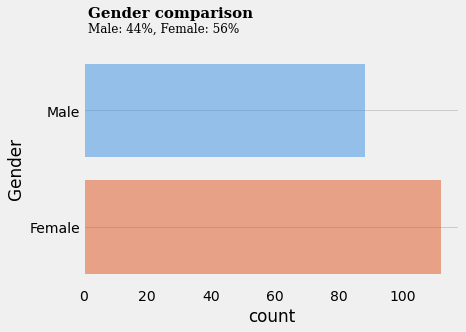

In [181]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax = sns.countplot(y = 'Gender', data = customers, palette = ('dodgerblue', 'orangered'), alpha = 0.5)

fig.text(0.09, 1, 'Gender comparison', fontsize = 15, fontweight = 'bold', fontfamily = 'serif')  
fig.text(0.09, 0.95, 'Male: 44%, Female: 56%', fontsize = 12, fontweight = 'light', fontfamily = 'serif')

plt.grid()
plt.show()

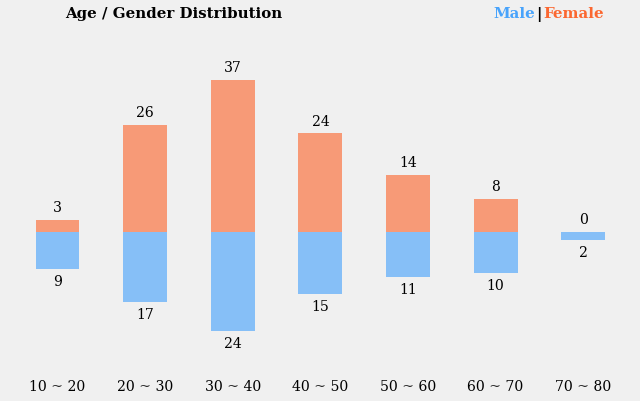

In [97]:
mf = customers.groupby('Gender')['Age_band'].value_counts().unstack().sort_index().fillna(0).astype(int)
female = mf.loc['Female']
male = -mf.loc['Male']

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.bar(male.index, male, width = 0.5, color = 'dodgerblue', alpha = 0.5, label = 'Male')
ax.bar(female.index, female, width = 0.5, color = 'orangered', alpha = 0.5, label = 'Female')
ax.set_ylim(-35, 50)

for i in female.index:
    ax.annotate(f'{female[i]}',
               xy = (i, female[i] + 3),
               va = 'center', ha = 'center', fontweight = 'light', fontfamily = 'serif', color = 'black')


for i in male.index:
    ax.annotate(f'{-male[i]}',
               xy = (i, male[i] - 3),
               va = 'center', ha = 'center', fontweight = 'light', fontfamily = 'serif', color = 'black')


for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.set_xticklabels(mf.columns, fontfamily = 'serif')
ax.set_yticks([])

ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Age / Gender Distribution', fontsize = 15, fontweight = 'bold', fontfamily = 'serif')

fig.text(0.755, 0.9, 'Male', fontweight = 'bold', fontfamily = 'serif', fontsize = 15, color = 'dodgerblue', alpha = 0.8)
fig.text(0.815, 0.9, '|', fontweight = 'bold', fontfamily = 'serif', fontsize = 15, color = 'black')
fig.text(0.825, 0.9, 'Female', fontweight = 'bold', fontfamily = 'serif', fontsize = 15, color = 'orangered', alpha = 0.8)

plt.grid()
plt.show()

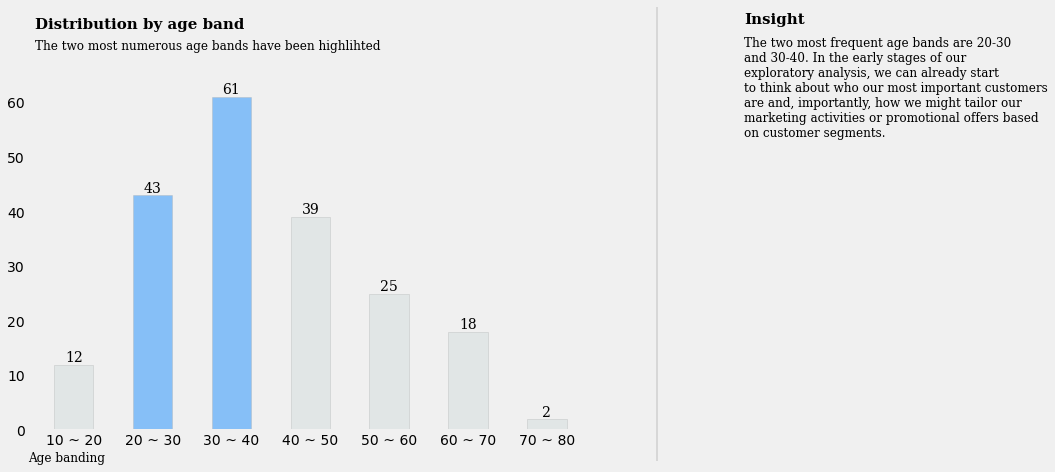

In [93]:
ab_order = ['10 ~ 20', '20 ~ 30', '30 ~ 40','40 ~ 50','50 ~ 60' ,'60 ~ 70', '70 ~ 80']
data = customers['Age_band'].value_counts()[ab_order]

# Plot

color_map = ['#d4dddd' for _ in range(9)]
color_map[2] = color_map[1] = 'dodgerblue'

fig, ax = plt.subplots(1, 1, figsize = (9, 6))
ax.bar(data.index, data, width = 0.5, edgecolor = 'darkgray',linewidth = 0.6, color = color_map, alpha = 0.5)

# Annotations

for i in data.index:
    ax.annotate(f'{data[i]}',
               xy = (i, data[i] + 1.3),
               va = 'center', ha = 'center', fontweight = 'light', fontfamily = 'serif')

# Title and sub-title    
    
fig.text(0.09, 1, 'Distribution by age band', fontsize = 15, fontweight = 'bold', fontfamily = 'serif')  
fig.text(0.09, 0.95, 'The two most numerous age bands have been highlihted', fontsize = 12, fontweight = 'light', fontfamily = 'serif')

fig.text(1.185, 1.01, 'Insight', fontsize = 15, fontweight = 'bold', fontfamily = 'serif')

fig.text(1.185, 0.715, '''
The two most frequent age bands are 20-30 
and 30-40. In the early stages of our 
exploratory analysis, we can already start
to think about who our most important customers
are and, importantly, how we might tailor our
marketing activities or promotional offers based
on customer segments.
''', fontsize = 12, fontweight = 'light', fontfamily = 'serif')

# Axis labels
plt.xlabel("Age banding", fontsize = 12, fontweight = 'light', fontfamily = 'serif', loc = 'left', y = -1.5)


l1 = lines.Line2D([1.05, 1.05], [0, 1.05], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])
plt.grid()

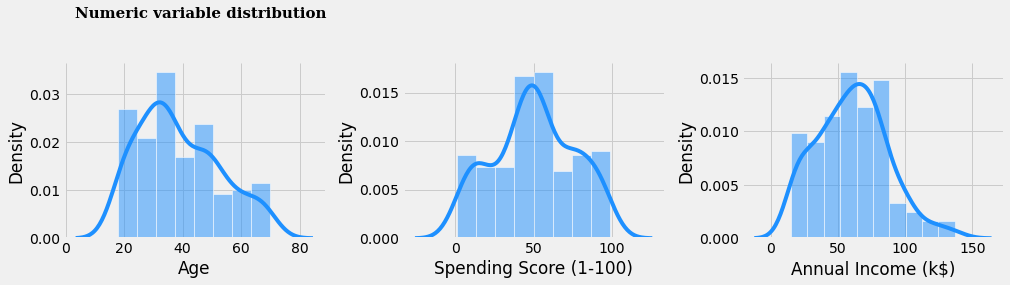

In [92]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize = (15,3))

# Title
fig.text(0.09, 1.09, 'Numeric variable distribution', fontsize = 15, fontweight = 'bold', fontfamily = 'serif')

# Grid spec layout
ax1 = fig.add_subplot(gs[0, 0])
ax1 = sns.distplot(customers['Age'], color = 'dodgerblue', hist_kws = dict(edgecolor = 'white', linewidth = 1, alpha = 0.5))

ax2 = fig.add_subplot(gs[0, 1])
ax2 = sns.distplot(customers["Spending Score (1-100)"], color = 'dodgerblue', hist_kws = dict(edgecolor = 'white', linewidth = 1, alpha = 0.5))

ax3 = fig.add_subplot(gs[0, 2])
ax3 = sns.distplot(customers["Annual Income (k$)"], color = 'dodgerblue', hist_kws = dict(edgecolor = 'white', linewidth = 1, alpha = 0.5))

sns.despine()

# useful for adjusting space between subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

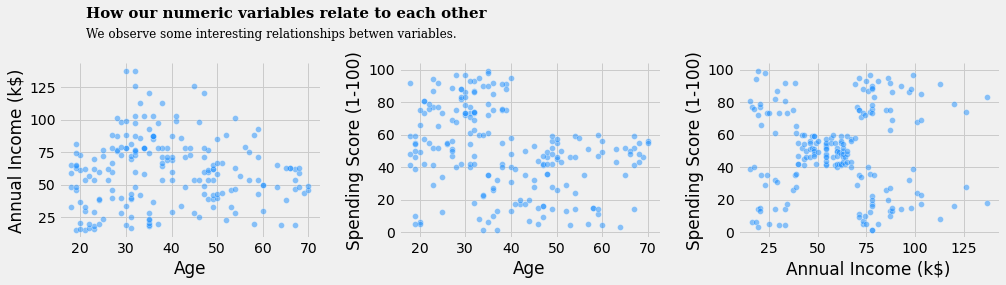

In [211]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3))

# Title and sub-title

fig.text(0.105, 1.09, 'How our numeric variables relate to each other', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, 1, 'We observe some interesting relationships betwen variables.', fontsize=12, fontweight='light', fontfamily='serif')

# Grid spec layout

ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.scatterplot(x = 'Age' , y = 'Annual Income (k$)' , data = customers,color='dodgerblue', alpha = 0.5)

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.scatterplot(x = 'Age' , y = 'Spending Score (1-100)' , data = customers,color='dodgerblue', alpha = 0.5)

ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
ax3 = sns.scatterplot(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = customers,color='dodgerblue', alpha = 0.5)

sns.despine()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) # useful for adjusting space between subplots

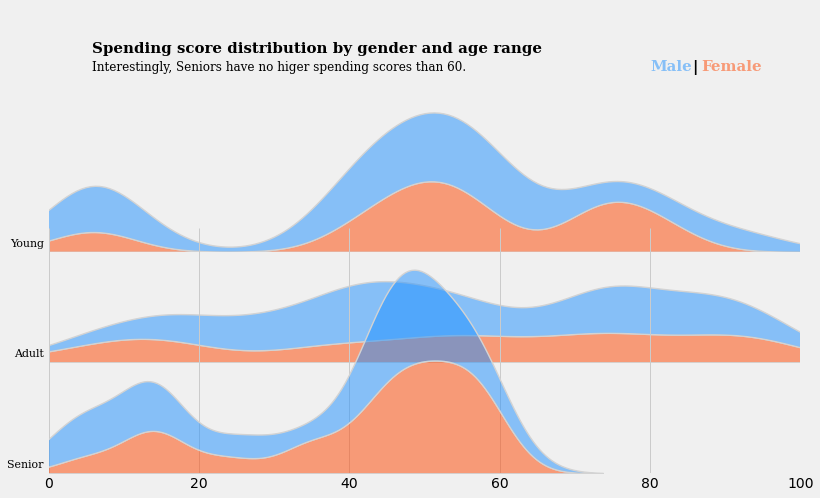

In [89]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -.55)

axes = list()
colors = ["#004c70", "#990000",'#990000']

for idx, cls, c in zip(range(4), customers['Age Range'].unique(), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    sns.kdeplot(x='Spending Score (1-100)', data=customers[customers['Age Range']==cls], 
                fill=True, ax=axes[idx], cut=3, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray',multiple="stack", palette=['dodgerblue','orangered'], alpha=0.5,hue='Gender') 
    
    
    
               
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 100)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0.001,f'{cls} ',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 4 : axes[idx].get_legend().remove() # changed to 4 to remove legend. This says, if it is not the 4th plot remove the legend

fig.text(0.13,0.8,"Spending score distribution by gender and age range", fontweight="bold", fontfamily='serif', fontsize=15)
fig.text(0.13,0.77,'Interestingly, Seniors have no higer spending scores than 60.',fontfamily='serif',fontsize=12)

fig.text(0.776,0.77,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='dodgerblue', alpha = 0.5)
fig.text(0.825,0.77,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.835,0.77,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='orangered', alpha = 0.5)

plt.show()

### K-means clustering

Before we continue with the implementation of Kmeans algorithm we should consider scaling our data. Because data sets like this contain features that have been measured in different units. A machine learning algorithm may consider one over the other as more important. The ML algorithm needs take into consideration all features on an even playing field. That means that values for all features must be transformed to the same scale.<br>
The process of transforming numerical features to use the same scale is known as feature scaling. It's an important data preprocessing step for most distance-based ML algorithms because it can have a significant impact on the performance of the algorithm.<br>
In this example the StandardScaler class is used. This class implements a type of feature scalling called standartization. Standardization scales, or shifts, the values for each numerical feature in our dataset so that the features have a mean of 0 and standard deviation of 1.

In [13]:
selected_cols = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age']
cluster_data = customers.loc[:, selected_cols]
scaler = StandardScaler()
X = scaler.fit_transform(cluster_data)

# What is KMeans?

The objective of K-means is simple: group similar data points together and discoveer underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

A cluster refers to a collection of data points aggregated together because of certain similarities.

The scikit-learn implementation is flexible, providing several parameters that can be tuned:
* *init* - controls the initialization technique. The standard version of *k*-means algorithm is implemented by setting *init* to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence.
* *n_clusters* - sets k for the clustering step. This is the most important parameter for *k*-means
* *n_init* - sets the number of initializations to perform. This is important because two runs can converge on different cluster assignements. The default behavior for the scikit-learn algorithm is to perform ten *k*-means runs and return the results of the one with the lowest SSE
* *max_iter* - sets the number of maximum iterations for each initialization of the *k*-means algorithm

### Choosing the appropriate Number of Clusters

There are two methods that are most commonly used to evaluate the appropriate number of clusters:
* The elbow method
* The silhouette coeffiecint

These are often used as complementary evaluation techniques rather than one being prefered over the other. To perform the elbow method, run several *k*-means, increment *k* with each iteration, and record the SSE.

In [14]:
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

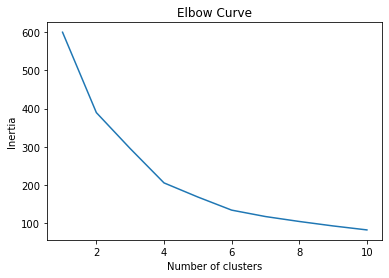

In [15]:
# Add axis labels
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

When we plot SSE as a function of the number of clusters, notice that SSE continues to decrease as we increase *k*. As more centeroids are added, the distance from each point to its closest centeroid will decrease.

There's a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

Using 6 clusters seems reasonably good just to be sure we will check also the silhouette score.

In [17]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

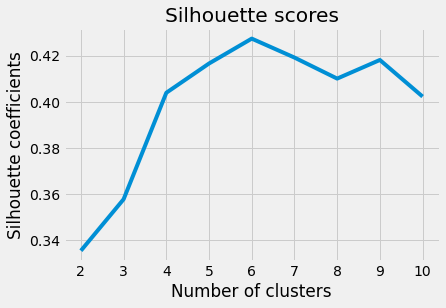

In [82]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.title('Silhouette scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficients')
plt.show()

### Silhouete score concepts:

* Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.

* Silhouette score takes into consideration the intra-cluster distance between the sample and other data points within the same cluster (a) and inter-cluster distance between the sample and the next nearest cluster (b).

* The silhouette score falls within the range [-1, 1].

* The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

* The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.

* The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

In [19]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0).fit(X)
labels = pd.DataFrame(kmeans.labels_)
labels.index += 1
clustered_data = cluster_data.assign(Cluster = labels)

In [20]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

,Cluster,Spending Score (1-100),Annual Income (k$),Age
0,0,16.8,88.5,41.3
1,1,77.6,25.3,25.0
2,2,49.1,54.3,56.3
3,3,82.1,86.5,32.7
4,4,49.1,56.7,27.0
5,5,19.4,26.3,45.5


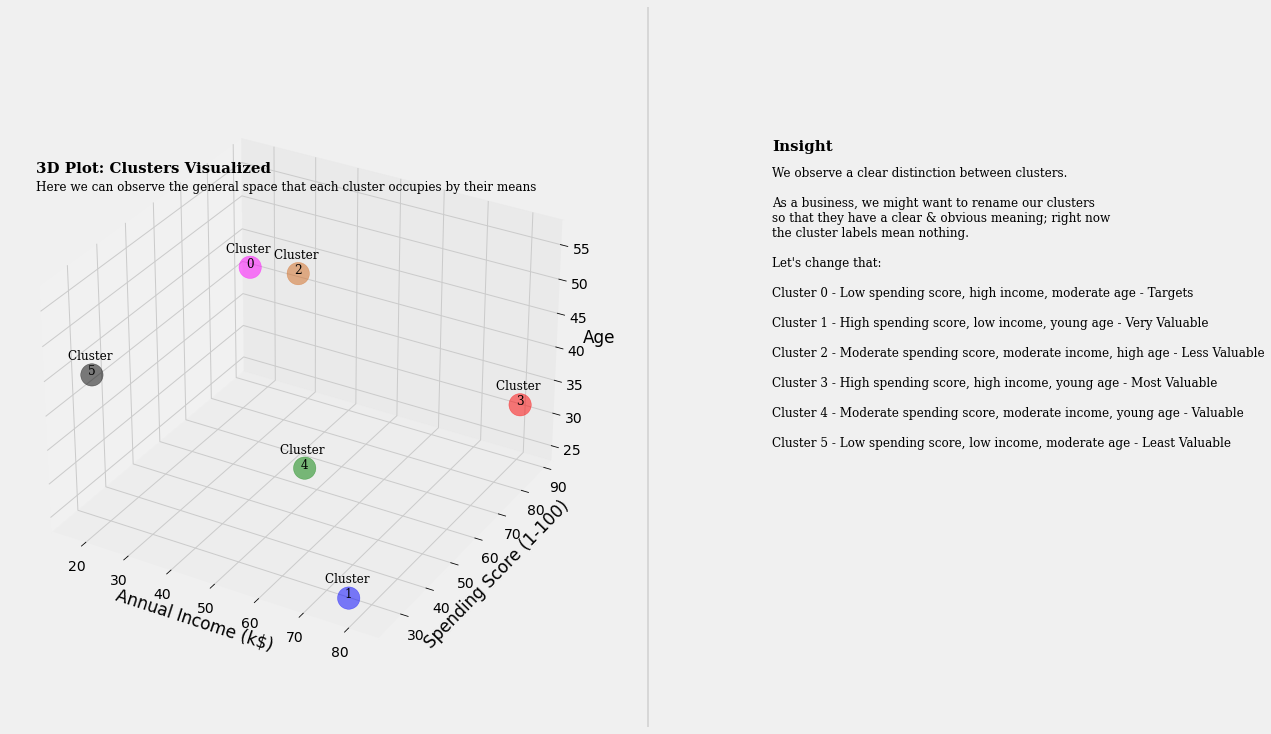

In [210]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(grouped_km2['Spending Score (1-100)'],
           grouped_km2['Annual Income (k$)'],
           grouped_km2['Age'],
           color = ['magenta', 'blue', 'chocolate', 'red', 'green', 'black'],
           alpha = 0.5, s = 500)

for line in range(0, grouped_km.shape[0]):
    ax.text(grouped_km2['Spending Score (1-100)'][line],
            grouped_km2['Annual Income (k$)'][line],
            grouped_km2['Age'][line],
            s = ('Cluster \n' + grouped_km2['Cluster'][line]),
            horizontalalignment = 'center', fontsize = 12, fontweight = 'light', fontfamily = 'serif')
    
ax.set_ylabel('Spending Score (1-100)')
ax.set_xlabel('Annual Income (k$)')
ax.set_zlabel('Age')

fig.text(0.15, 0.77, '3D Plot: Clusters Visualized', fontsize = 15, fontweight = 'bold', fontfamily = 'serif')
fig.text(0.15, 0.745, 'Here we can observe the general space that each cluster occupies by their means', fontsize = 12, fontweight = 'light', fontfamily = 'serif')

fig.text(1.172, 0.80, 'Insight', fontsize = 15, fontweight = 'bold', fontfamily = 'serif')

fig.text(1.172, 0.347, '''
We observe a clear distinction between clusters. 

As a business, we might want to rename our clusters
so that they have a clear & obvious meaning; right now
the cluster labels mean nothing. 

Let's change that:

Cluster 0 - Low spending score, high income, moderate age - Targets

Cluster 1 - High spending score, low income, young age - Very Valuable

Cluster 2 - Moderate spending score, moderate income, high age - Less Valuable

Cluster 3 - High spending score, high income, young age - Most Valuable

Cluster 4 - Moderate spending score, moderate income, young age - Valuable

Cluster 5 - Low spending score, low income, moderate age - Least Valuable

'''
         , fontsize = 12, fontweight = 'light', fontfamily = 'serif')

l1 = lines.Line2D([1, 1], [0, 1], transform = fig.transFigure, figure = fig, color = 'black', lw = 0.2) 
fig.lines.extend([l1])

In [104]:
cluster_only = clustered_data[['Cluster']]
merge = pd.merge(customers, cluster_only, left_index = True, right_index = True)

In [108]:
merge['Cluster_Label'] = merge['Cluster'].apply(lambda x: 'Targets' if x == 0 else
                                               'Very Valuable' if x == 1 else
                                               'Less Valuable' if x == 2 else
                                               'Most Valuable' if x == 3 else
                                               'Valuable' if x == 4 else
                                               'Least Valuable')

In [110]:
merge['Sex (100 = Male)'] = merge['Gender'].apply(lambda x: 100 if x == 'Male' else 0)

In [114]:
merge['Cluster'] = merge['Cluster'].map(str)
cluster_ord = ['0', '1', '2', '3', '4', '5']
clus_label_order = ['Targets','Most Valuable','Very Valuable','Valuable','Less Valuable','Least Valuable']

In [117]:
q3_order = merge['Cluster_Label'].value_counts().index

clu_data = merge['Cluster_Label'].value_counts()[clus_label_order]

data_cg = merge.groupby('Cluster_Label')['Gender'].value_counts().unstack().loc[clus_label_order]
data_cg['sum'] = data_cg.sum(axis=1)

data_cg_ratio = (data_cg.T / data_cg['sum']).T[['Male', 'Female']][::-1]

In [128]:
clustered_data = merge
clustered_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range,Age_band,Cluster,Cluster_Label,Sex (100 = Male)
CustomerID,,,,,,,,,
1,Male,19,15,39,Young,10 ~ 20,1,Very Valuable,100
2,Male,21,15,81,Young,20 ~ 30,1,Very Valuable,100
3,Female,20,16,6,Young,20 ~ 30,5,Least Valuable,0
4,Female,23,16,77,Adult,20 ~ 30,1,Very Valuable,0
5,Female,31,17,40,Adult,30 ~ 40,5,Least Valuable,0
...,...,...,...,...,...,...,...,...,...
196,Female,35,120,79,Adult,30 ~ 40,3,Most Valuable,0
197,Female,45,126,28,Adult,40 ~ 50,0,Targets,0
198,Male,32,126,74,Adult,30 ~ 40,3,Most Valuable,100


In [140]:
df = clustered_data[['Cluster_Label','Age','Annual Income (k$)','Spending Score (1-100)','Sex (100 = Male)']]
df = df.groupby('Cluster_Label')['Cluster_Label','Age','Annual Income (k$)','Spending Score (1-100)','Sex (100 = Male)'].mean().reset_index()

In [142]:
df_hm = df.set_index('Cluster_Label')
df_hm = df_hm.reindex(['Targets',
 'Most Valuable',
 'Very Valuable',
 'Valuable',
 'Less Valuable',
 'Least Valuable'])

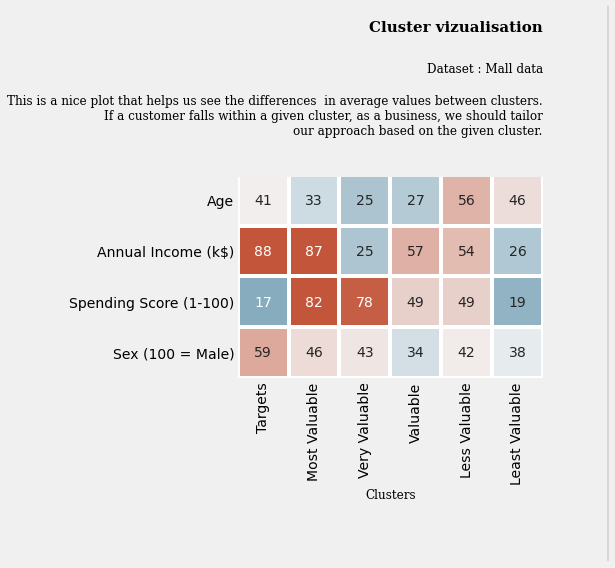

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))


cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_hm.T, 
            square=True,
            linewidth=3, 
            vmax=80, vmin=1, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1.05, 'Cluster vizualisation', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
fig.text(0.97, 0.97, 'Dataset : Mall data', fontweight='light', fontfamily='serif', fontsize=12, ha='right')    

fig.text(0.97, 0.955, '''
This is a nice plot that helps us see the differences  in average values between clusters.
If a customer falls within a given cluster, as a business, we should tailor
our approach based on the given cluster.
''', 
         fontweight='light', fontfamily='serif', fontsize=12, va='top', ha='right') 

import matplotlib.lines as lines
l1 = lines.Line2D([1.1, 1.1], [0, 1.1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

plt.xlabel("Clusters", fontsize=12, fontweight='light', fontfamily='serif')



plt.tight_layout()
plt.show()